## Paqueterías

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

---

# Proyecto Final
**Laboratorio de Análisis Financiero y de Diseño de Indicadores**

**Integrantes del equipo:**
- Luis Eduardo Jiménez del Muro
- Lenin Adair Quezada Gómez
- José Armando Melchor Soto
- Edgar Alfonso Ramos Gómez

**Fecha: 26/11/2024**

## Funciones del Programa 

## Carga de Datos 

In [ ]:
reparaciones = pd.read_csv('reparaciones.csv')
reparaciones.head()

,CLIENTE,DESCRIPCION FALLA,INGRESO,CLUSTER,SIMILITUD COSENO,COHORT
0,2,revision general tndr cambio del panel de cont...,1820.0,Impresora Laser,0.298307,2017-11
1,2,imprime negro tn mantenimiento iva,480.0,Impresora Tinta,0.391361,2017-11
2,2,rev gral cartucho toner reparacion traccion de...,1030.0,Impresora Laser,0.508475,2017-11
3,2,rev gral sin toner con cable de energia bue...,530.0,Impresora Laser,0.493519,2017-11
4,2,rev gral sin toner cambio de contacto del ca...,480.0,Impresora Laser,0.448675,2017-11


## Limpieza de los datos

En esta sección principalmente se observará la distribución de las similitudes coseno y establecer un threshold para eliminar la clasificación imprecisa que pudo tener el modelo de embedding vectors.

### Número de fallas por cluster antes de limpieza

<BarContainer object of 4 artists>

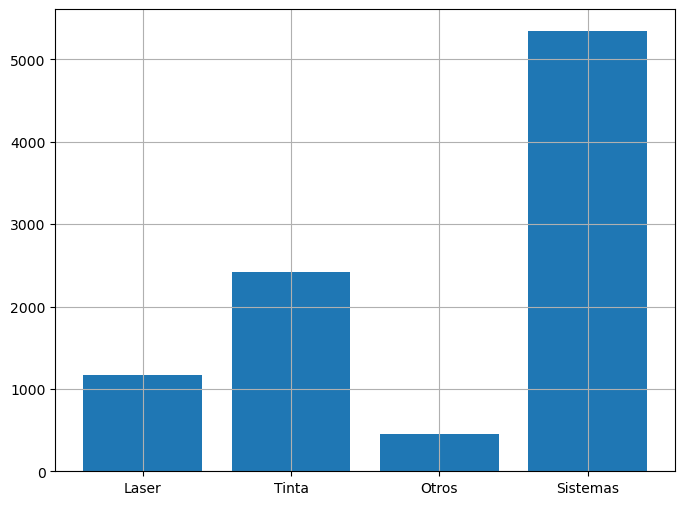

In [15]:
plt.figure(figsize=(8,6))
plt.grid()
plt.bar(['Laser', 'Tinta', 'Otros', 'Sistemas'], reparaciones.groupby('CLUSTER')['CLUSTER'].count())

### Distribución de las similitudes coseno

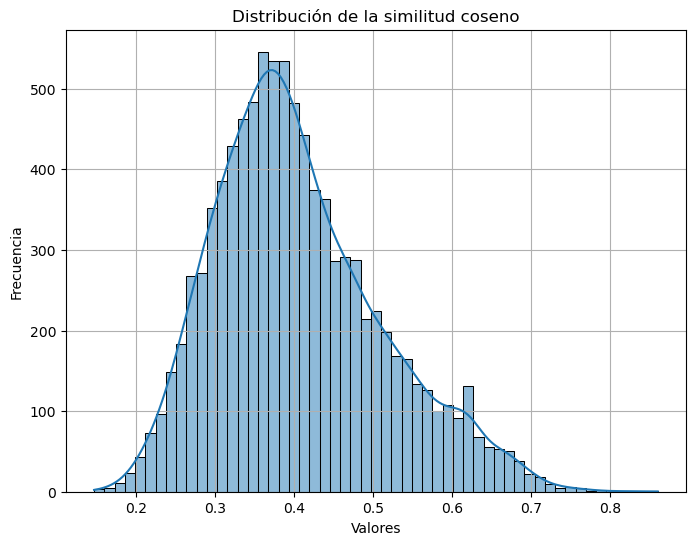

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(reparaciones['SIMILITUD COSENO'], kde=True)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la similitud coseno')
plt.grid()

### Establecimiento del threshold

Decidimos limpar a partir del percentil ###, lo que significa que no nos interesan los registros que sean menores al percentil ###. Los que estén por encima del percentil ### no tenemos que eliminarlos porque esos representan a los que el modelo relacionó mejor.

In [24]:
threshold = reparaciones['SIMILITUD COSENO'].quantile(0.1)
threshold

0.280610904

### Número de fallas fuera del threshold

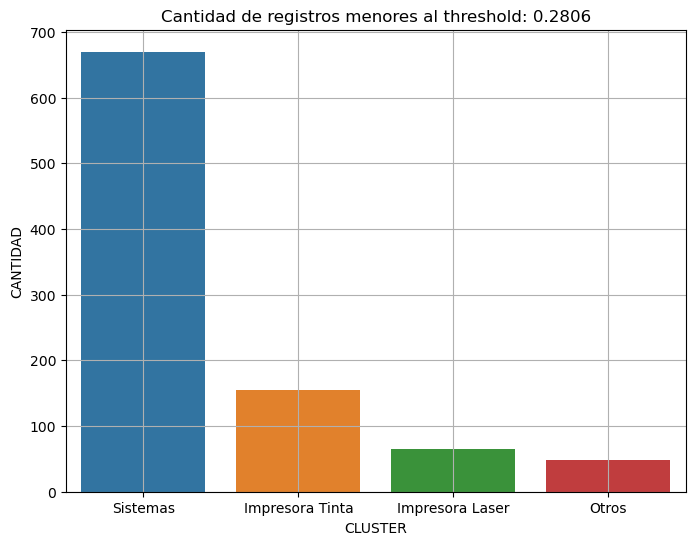

In [25]:
df_filtrado = reparaciones[reparaciones['SIMILITUD COSENO'] < threshold]

conteo_clusters = df_filtrado['CLUSTER'].value_counts().reset_index()
conteo_clusters.columns = ['CLUSTER', 'cantidad']

plt.figure(figsize=(8,6))
sns.barplot(data=conteo_clusters, x='CLUSTER', y='cantidad')
plt.xlabel('CLUSTER')
plt.ylabel('CANTIDAD')
plt.title(f'Cantidad de registros menores al threshold: {threshold:.4f}')
plt.grid()

In [26]:
reparaciones_thresholded = reparaciones[reparaciones['SIMILITUD COSENO'] >= threshold].reset_index()
reparaciones_thresholded = reparaciones_thresholded.drop(columns='index')
reparaciones_thresholded

,CLIENTE,DESCRIPCION FALLA,INGRESO,CLUSTER,SIMILITUD COSENO,COHORT
0,2,revision general tndr cambio del panel de cont...,1820.0,Impresora Laser,0.298307,2017-11
1,2,imprime negro tn mantenimiento iva,480.0,Impresora Tinta,0.391361,2017-11
2,2,rev gral cartucho toner reparacion traccion de...,1030.0,Impresora Laser,0.508475,2017-11
3,2,rev gral sin toner con cable de energia bue...,530.0,Impresora Laser,0.493519,2017-11
4,2,rev gral sin toner cambio de contacto del ca...,480.0,Impresora Laser,0.448675,2017-11
...,...,...,...,...,...,...
8432,1853,arroja una luz roja en la hoja se traba al que...,1970.0,Sistemas,0.367617,2024-10
8433,1843,marcaba error de fusor y luego error de escane...,4790.0,Impresora Laser,0.458887,2024-09
8434,1841,arruga las hojas y se atora cambio de filmin...,2575.0,Otros,0.408079,2024-09
8435,1845,retirar bateria hinchada contrasea leonfr elim...,600.0,Impresora Tinta,0.651373,2024-02


<BarContainer object of 4 artists>

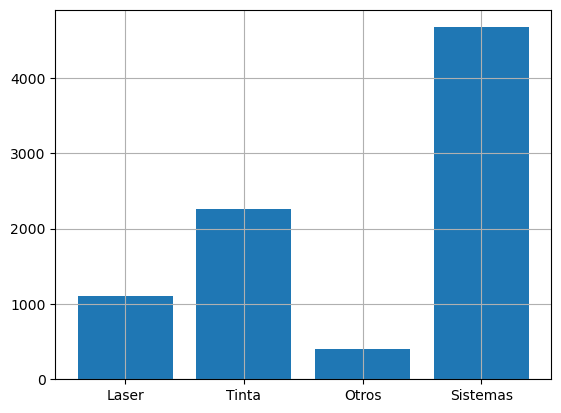

In [27]:
plt.grid()
plt.bar(['Laser', 'Tinta', 'Otros', 'Sistemas'], reparaciones_thresholded.groupby('CLUSTER')['CLUSTER'].count())

In [34]:
reparaciones = reparaciones_thresholded[['CLIENTE', 'DESCRIPCION FALLA', 'INGRESO', 'CLUSTER', 'COHORT']]

## Exploración de Datos 

In [35]:
reparaciones

,CLIENTE,DESCRIPCION FALLA,INGRESO,CLUSTER,COHORT
0,2,revision general tndr cambio del panel de cont...,1820.0,Impresora Laser,2017-11-01
1,2,imprime negro tn mantenimiento iva,480.0,Impresora Tinta,2017-11-01
2,2,rev gral cartucho toner reparacion traccion de...,1030.0,Impresora Laser,2017-11-01
3,2,rev gral sin toner con cable de energia bue...,530.0,Impresora Laser,2017-11-01
4,2,rev gral sin toner cambio de contacto del ca...,480.0,Impresora Laser,2017-11-01
...,...,...,...,...,...
8432,1853,arroja una luz roja en la hoja se traba al que...,1970.0,Sistemas,2024-10-01
8433,1843,marcaba error de fusor y luego error de escane...,4790.0,Impresora Laser,2024-09-01
8434,1841,arruga las hojas y se atora cambio de filmin...,2575.0,Otros,2024-09-01
8435,1845,retirar bateria hinchada contrasea leonfr elim...,600.0,Impresora Tinta,2024-02-01


In [ ]:
reparaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLIENTE            8437 non-null   int64  
 1   DESCRIPCION FALLA  8437 non-null   object 
 2   INGRESO            8437 non-null   float64
 3   CLUSTER            8437 non-null   object 
 4   SIMILITUD COSENO   8437 non-null   float64
 5   COHORT             8437 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 395.6+ KB


In [38]:
reparaciones['COHORT'] = pd.to_datetime(reparaciones['COHORT'])
reparaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLIENTE            8437 non-null   int64         
 1   DESCRIPCION FALLA  8437 non-null   object        
 2   INGRESO            8437 non-null   float64       
 3   CLUSTER            8437 non-null   object        
 4   COHORT             8437 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 329.7+ KB


## Análisis y cálculo de los KPIs

### Customer Life Time Value

In [43]:
ltv = reparaciones.groupby(['CLIENTE'])['INGRESO'].sum().reset_index()
ltv.sort_values('INGRESO', ascending=False)

,CLIENTE,INGRESO
26,33,348702.94
40,50,300301.00
11,17,241241.80
20,26,240884.88
64,77,235516.60
...,...,...
683,847,80.00
455,586,80.00
168,201,80.00
838,1032,51.00
